# Il dataset 04cars
Il datasete comprende 428 auto del 2004.
Alcune delle variabili nel dataset sono: prezzo di vendità consigliato in dollari, prezzo di listino in dollari,
variabili dummy per la categoria dell'auto (es: SUV, auto sportiva, pickup) e per la grandezza dell'auto, sono presenti anche variabili legate alle caratteristiche tecniche come peso, cilindrata, distanza tra gli assi ecc...
Alcune variabili (es:hp, citympg...) riportano il tipo object e sembrano non avere missing values, questo perchè chi ha raccolto
i dati ha usato il simbolo '*' al posto Nan che viene usato per i missing values.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("/home/matthew/Scrivania/uni/MASL/esercizi_python/data/dataset_pca.csv", decimal=",", na_values=['*'])
ds.head()

,Vehicle Name,Small/Sporty/ Compact/Large Sedan,Sports Car,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,Acura 3.5 RL 4dr,1,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18.0,24.0,3880.0,115.0,197.0,72.0
1,Acura 3.5 RL w/Navigation 4dr,1,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18.0,24.0,3893.0,115.0,197.0,72.0
2,Acura MDX,0,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17.0,23.0,4451.0,106.0,189.0,77.0
3,Acura NSX coupe 2dr manual S,0,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17.0,24.0,3153.0,100.0,174.0,71.0
4,Acura RSX Type S 2dr,1,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24.0,31.0,2778.0,101.0,172.0,68.0


In [3]:
ds.info(verbose=True, memory_usage=True)
ds.columns = ds.columns.str.lower()
ds.columns = ds.columns.str.replace(' ', '')
ds.rename(columns ={'enginesize(l)':'enginesize'}, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 20 columns):
Vehicle Name                         428 non-null object
Small/Sporty/ Compact/Large Sedan    428 non-null int64
Sports Car                           428 non-null int64
SUV                                  428 non-null int64
Wagon                                428 non-null int64
Minivan                              428 non-null int64
Pickup                               428 non-null int64
AWD                                  428 non-null int64
RWD                                  428 non-null int64
Retail Price                         428 non-null int64
Dealer Cost                          428 non-null int64
Engine Size (l)                      428 non-null float64
Cyl                                  428 non-null int64
HP                                   428 non-null int64
City MPG                             414 non-null float64
Hwy MPG                              414 non-null 

# Le caratteristiche medie 
Ignorando le prime 8 colonne che riguardano le variabili dummy, le medie e le standard daviation
delle variabili Retail Price e Dealer Cost sono molto simili, questo perchè i 2 prezzi sono collegati e avranno
una forte correlazione.


In [4]:
name_var = ds.columns.values
categ_column = ['vehiclename ', 'small/sporty/compact/largesedan','sportscar ', 'suv', 'wagon'
                 , 'minivan', 'pickup', 'awd', 'rwd']
numeric_column = ['retailprice', 'dealercost', 'enginesize', 'cyl', 'hp', 'citympg', 'hwympg'
                  , 'weight', 'wheelbase', 'len', 'width']
ds.describe()

,small/sporty/compact/largesedan,sportscar,suv,wagon,minivan,pickup,awd,rwd,retailprice,dealercost,enginesize,cyl,hp,citympg,hwympg,weight,wheelbase,len,width
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,414.000000,414.000000,426.000000,426.000000,402.000000,400.000000
mean,0.572430,0.114486,0.140187,0.070093,0.046729,0.056075,0.214953,0.257009,32774.855140,30014.700935,3.196729,5.775701,215.885514,20.089372,26.905797,3577.213615,108.173709,185.126866,71.292500
std,0.495305,0.318773,0.347587,0.255603,0.211305,0.230335,0.411271,0.437496,19431.716674,17642.117750,1.108595,1.622779,71.836032,5.213062,5.696804,760.437663,8.326449,13.312523,3.393484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10280.000000,9875.000000,1.300000,-1.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000,64.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3102.000000,103.000000,177.000000,69.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,186.000000,71.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.000000,29.000000,3974.250000,112.000000,193.000000,73.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,227.000000,81.000000


# Gestione dei missing values
Le colonne citympg, hwympg, len, witdh, wheelbase e weight hanno dei missing values,
per gestirli e usare tutti i dati per la PCA, uso la media.

In [5]:
ds.isnull().sum()

vehiclename                         0
small/sporty/compact/largesedan     0
sportscar                           0
suv                                 0
wagon                               0
minivan                             0
pickup                              0
awd                                 0
rwd                                 0
retailprice                         0
dealercost                          0
enginesize                          0
cyl                                 0
hp                                  0
citympg                            14
hwympg                             14
weight                              2
wheelbase                           2
len                                26
width                              28
dtype: int64

In [6]:
ds.fillna(ds.mean(), inplace=True)
ds.isnull().sum()

vehiclename                        0
small/sporty/compact/largesedan    0
sportscar                          0
suv                                0
wagon                              0
minivan                            0
pickup                             0
awd                                0
rwd                                0
retailprice                        0
dealercost                         0
enginesize                         0
cyl                                0
hp                                 0
citympg                            0
hwympg                             0
weight                             0
wheelbase                          0
len                                0
width                              0
dtype: int64

# Analisi della scatter matrix e di correlazione
Dalla matrice degli scatterplot possiamo cogliere che nel dataset
sono presenti molti relazioni tra le varie colonne.
Per esempio avevamo detto che retailprice e dealercost erano correlate tra di loro,
infatti tra di loro 2 esisten una relazione lineare e la matrice di correlazione dice che 
le 2 variabili sono correlate positivamente al 99.9%.
Non ci sarebbe bisogno della PCA per decidere che le 2 siano ridodanti, ma vediamo di mettere alla
prova l'algoritmo della PCA


/home/matthew/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


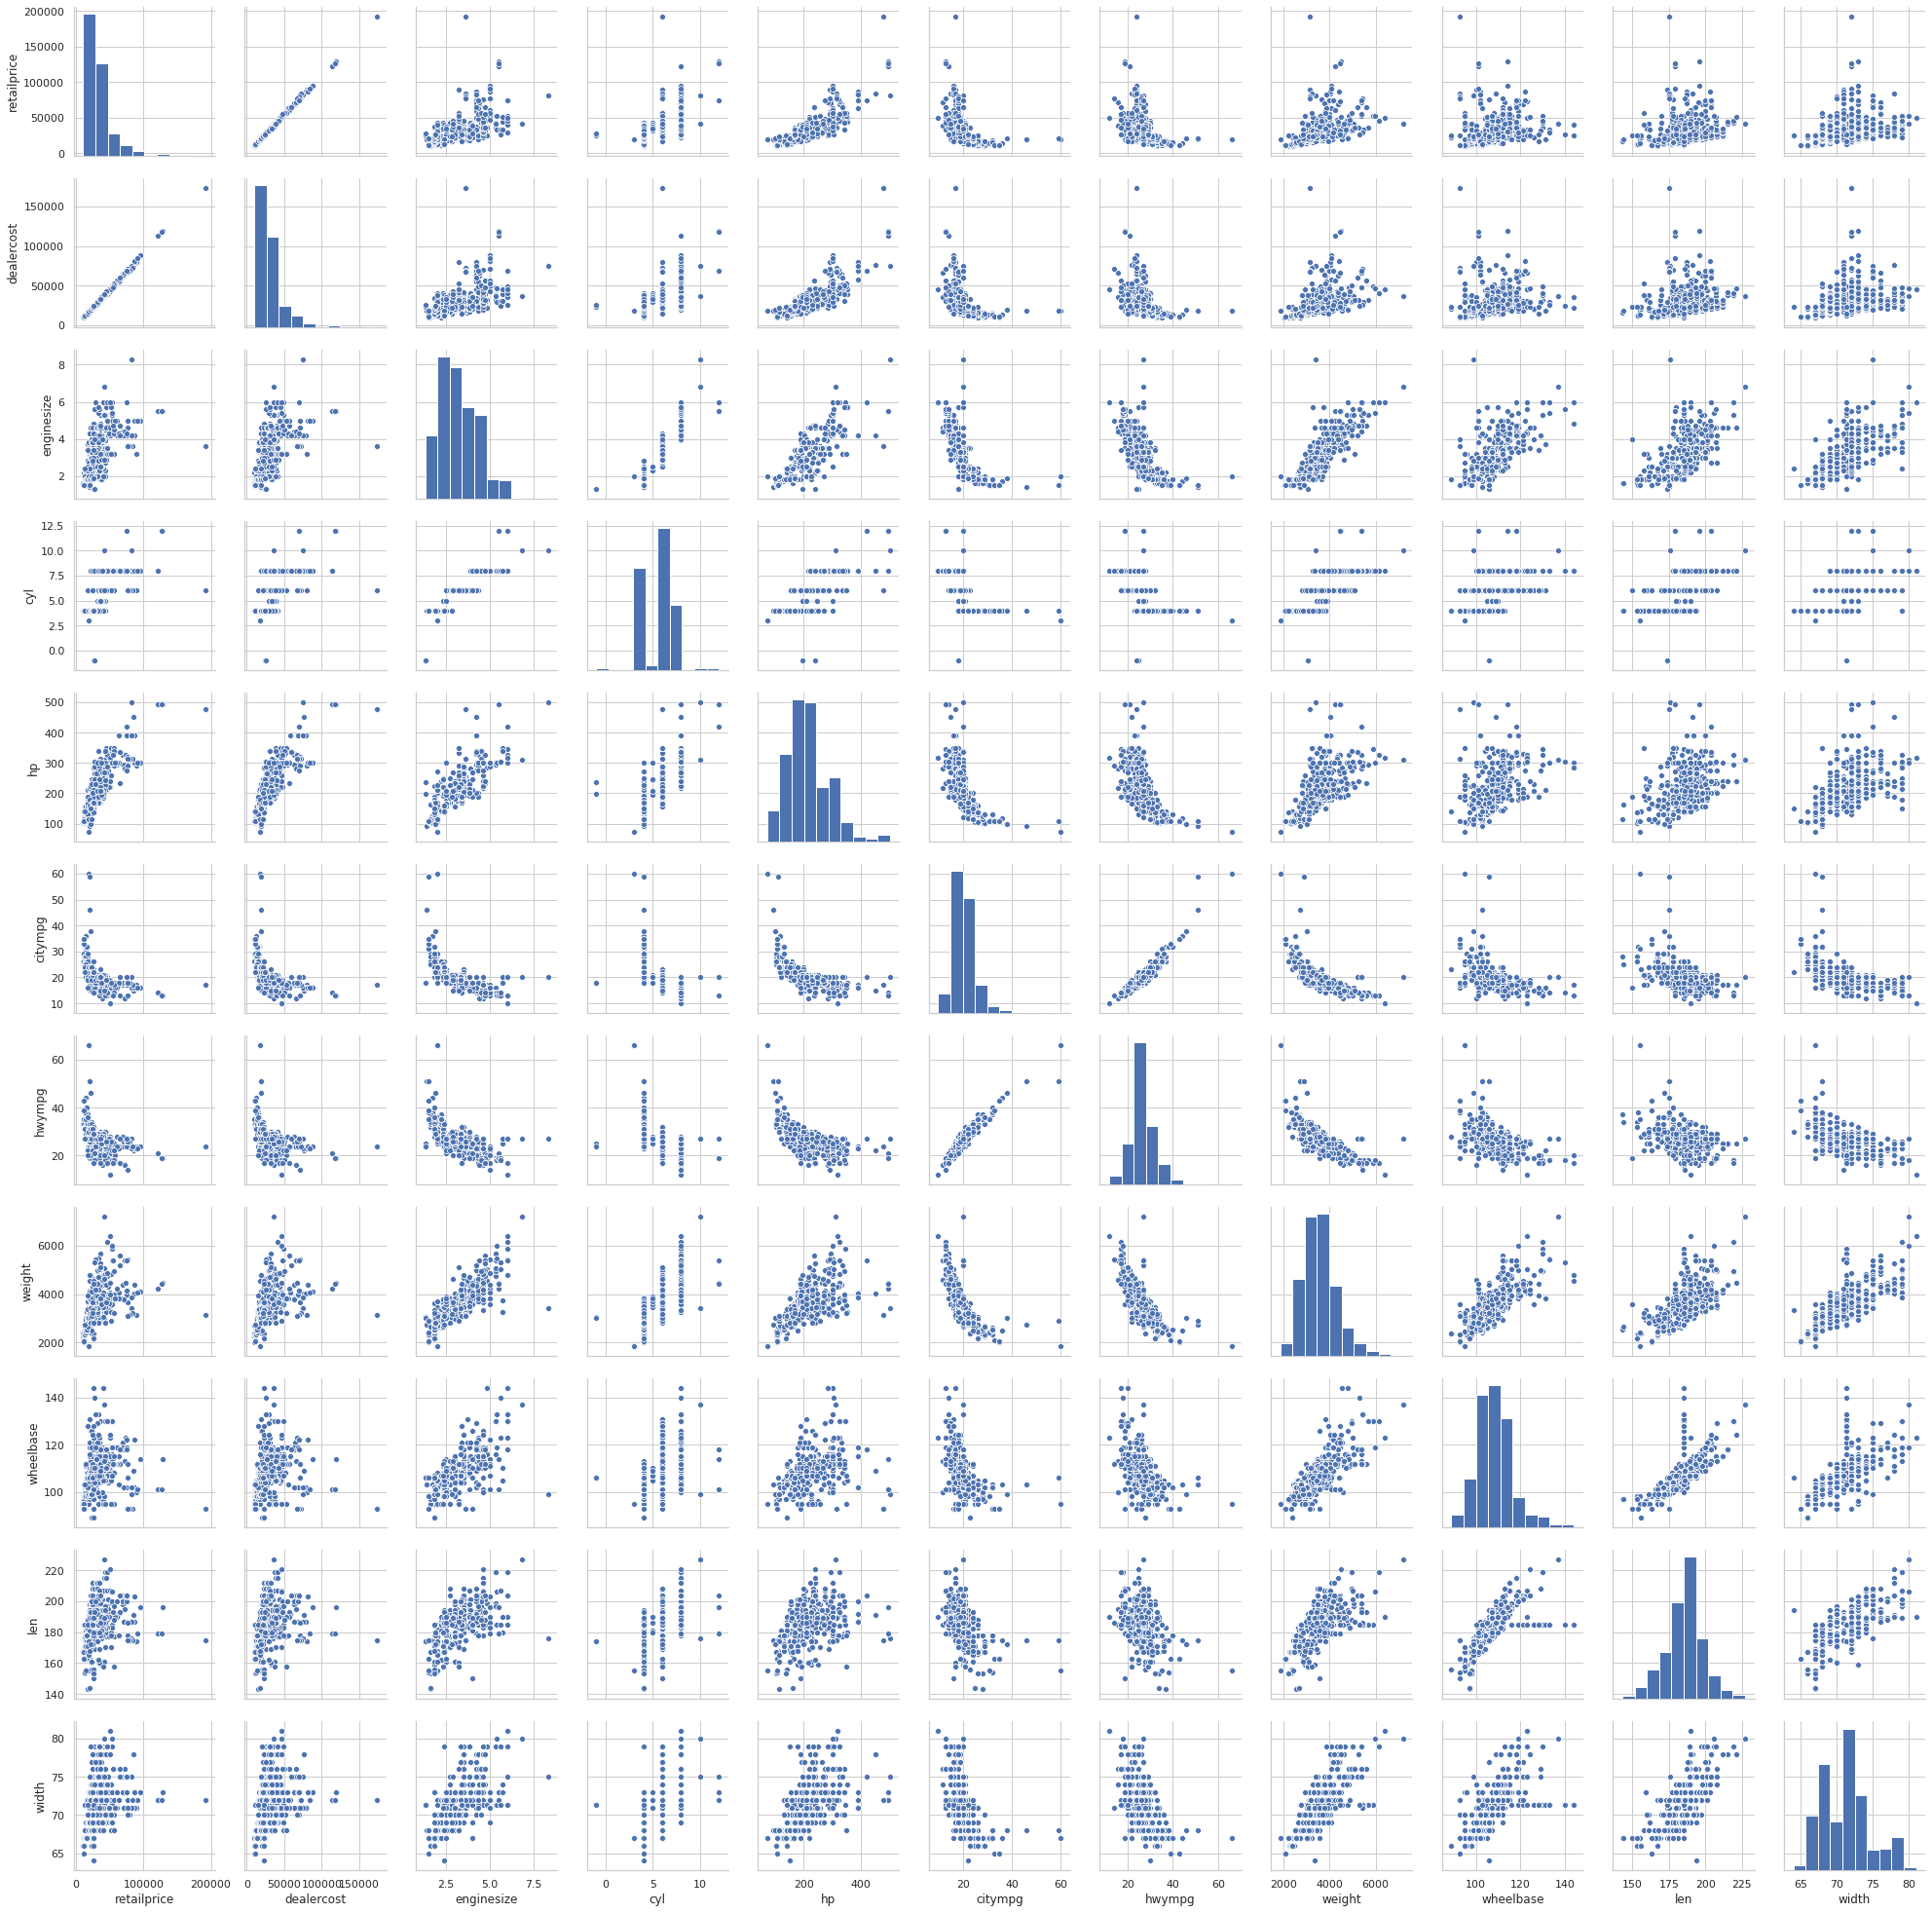

In [7]:
import seaborn as sns
sns.set(style="whitegrid", context='notebook')
sns.pairplot(ds[numeric_column],size= 2.5)
plt.show()

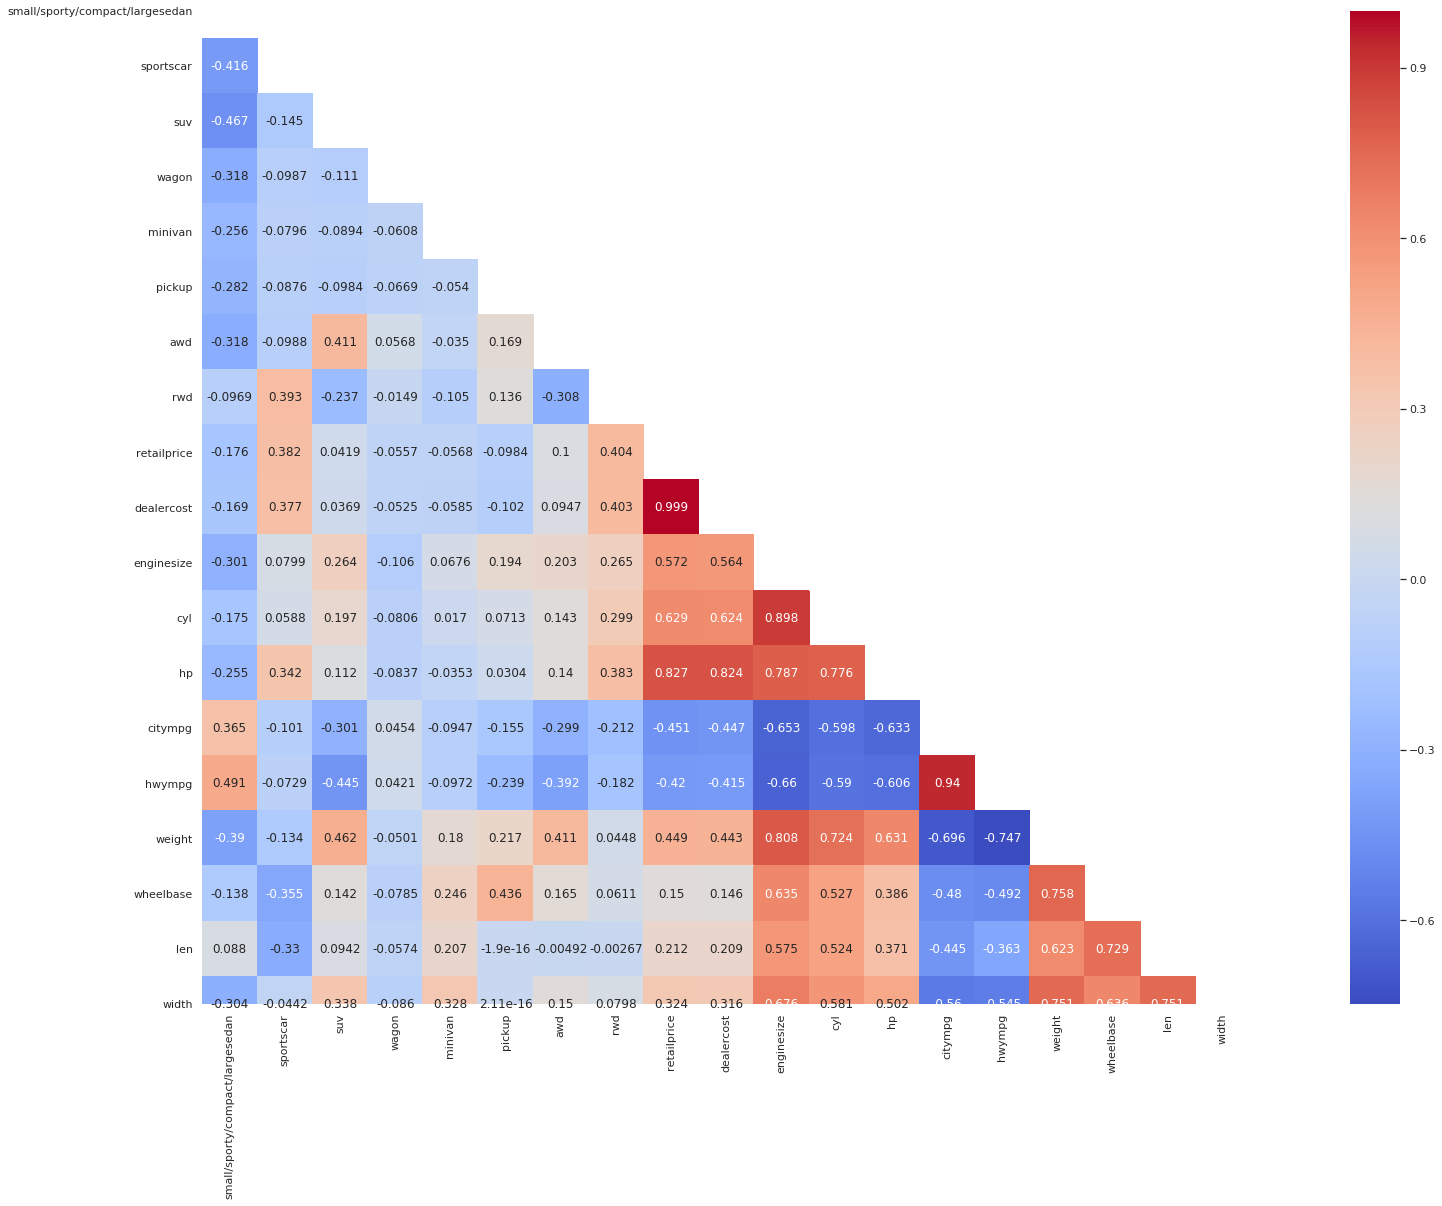

In [8]:
plt.figure(figsize=(35.69,18.27))
corr_matrix = ds.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr_matrix,mask= mask, annot= True, fmt ='.3g',square= True,
                     cmap= 'coolwarm')
plt.show()

# Principal component Analysis
Per scrivere il codice della PCA uso la libreria Scikit-learn che contiene 
la classe StandardScaler che mi consente di standardizzare i dati.

In [9]:
from sklearn.preprocessing import StandardScaler
X = ds.iloc[:,1:].values
sc = StandardScaler()
X_std = sc.fit_transform(X)

Ora ricavo la matrice di covarianza dai dati

In [10]:
cov_mat = np.cov(X_std.T) #devo passare le colonne
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("Autovalori: \n",eigen_vals)

Autovalori: 
 [7.29767098e+00 2.77986532e+00 1.97638283e+00 1.40110173e+00
 1.25084334e+00 1.06585077e+00 7.99500194e-01 6.31093505e-01
 4.76078514e-01 3.89102099e-01 3.73287900e-01 1.78935409e-01
 1.35677454e-01 1.11910369e-01 7.54533970e-02 6.72398451e-02
 3.37306048e-02 1.14809106e-15 7.72227688e-04]


Da essa ricavo gli autovalori e autovettori, che escludendo la variabile che indica 
il nome dell'auto, dovrebbero essere 19 autovettori e auto valori per queste 19 variabili.

In [11]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("Autovalori: \n",eigen_vals)
print("Il numero di autovalori(autovettori) è {}".format(len(eigen_vals)))

Autovalori: 
 [7.29767098e+00 2.77986532e+00 1.97638283e+00 1.40110173e+00
 1.25084334e+00 1.06585077e+00 7.99500194e-01 6.31093505e-01
 4.76078514e-01 3.89102099e-01 3.73287900e-01 1.78935409e-01
 1.35677454e-01 1.11910369e-01 7.54533970e-02 6.72398451e-02
 3.37306048e-02 1.14809106e-15 7.72227688e-04]
Il numero di autovalori(autovettori) è 19


Ora per ogni variabile calcolo la sua varianza spiegata per cercare di capire
il suo contributo informativo nei dati.

In [12]:
tot = np.sum(eigen_vals)
var_exp = [(labda_i/tot) for labda_i in -np.sort(-eigen_vals, kind="mergesort", axis=None)]

Ora faccio un grafico che mostra il potere informativo delle variabili

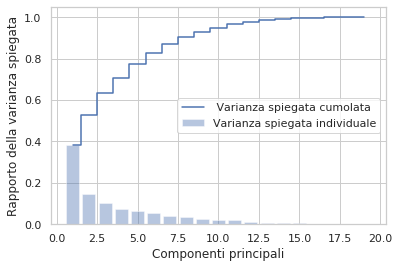

<Figure size 2569.68x1315.44 with 0 Axes>

In [13]:
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(np.arange(1,len(eigen_vals)+1), var_exp, alpha =0.4, align = "center", label = "Varianza spiegata individuale")
plt.step(np.arange(1,len(eigen_vals)+1), cum_var_exp, where='mid', label = " Varianza spiegata cumolata")
plt.xlabel("Componenti principali")
plt.ylabel("Rapporto della varianza spiegata")
plt.legend(loc = 'best')
plt.figure(figsize=(35.69,18.27))
plt.show()


# Analisi del grafico ottenuto
L'algoritmo di PCA ci dice che le variabili small/sporty/compact/largesedan,
sportscar e suv spiegano tutte e 3 insime più del 60% della variabilità nei dati.
Adesso calcolo la matrice di trasformazione ed eseguo  scatter plot 3D per vedere
come il nuovo spazio dei dati.

In [14]:
eigen_pair = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
               for i in np.arange(len(eigen_vals))]
eigen_pair.sort(reverse=True)
U = np.hstack(((eigen_pair[0][1][:, np.newaxis],eigen_pair[1][1][:, np.newaxis]
                , eigen_pair[2][1][:, np.newaxis])))
print("Matrice U:\n",U)

Matrice U:
 [[-0.1526634   0.00863404 -0.52586655]
 [ 0.03853302  0.44337653  0.23264585]
 [ 0.13058871 -0.21230359  0.37488918]
 [-0.02976737 -0.01092396  0.19187005]
 [ 0.05026307 -0.17656511 -0.07386159]
 [ 0.06481208 -0.13770275  0.0979491 ]
 [ 0.1131483  -0.18675754  0.40655609]
 [ 0.10284321  0.35670798 -0.12473656]
 [ 0.25212425  0.36393269 -0.03621087]
 [ 0.24987424  0.36541574 -0.03946774]
 [ 0.33704975  0.00445248 -0.08197448]
 [ 0.31625242  0.0709976  -0.13655266]
 [ 0.31205291  0.24349978 -0.04461076]
 [-0.30278012  0.02980426 -0.11172545]
 [-0.30595514  0.06844152 -0.21618058]
 [ 0.33358324 -0.18396999  0.02890751]
 [ 0.24891235 -0.29874928 -0.21742833]
 [ 0.22706391 -0.23695831 -0.37980142]
 [ 0.28299631 -0.17535149 -0.1195228 ]]


In [15]:
X_pca_sdt = X_std.dot(U)

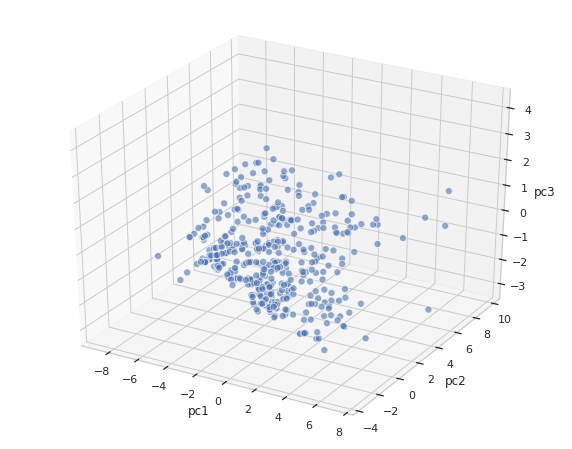

In [16]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_sdt[:,0], X_pca_sdt[:,1], X_pca_sdt[:,2], s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')

plt.show()



# Versione con scikit-learn
Adesso per verificare la corretteza dei risultati, provo a riottenere gli
stessi risultati con la versione della PCA di Scikit-learn.

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_pca_sdt_sk = pca.fit_transform(X_std)

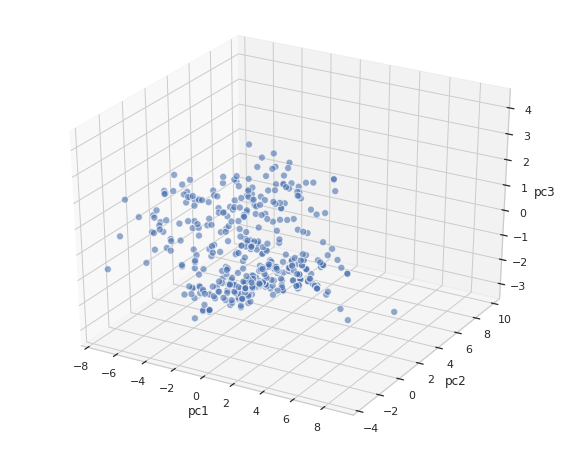

In [18]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_sdt_sk[:,0], X_pca_sdt_sk[:,1], X_pca_sdt_sk[:,2], s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')

plt.show()


La nuvola dei dati è molto simile a quella precedente... non capisco se abbia 
sbagliato qualcosa nel procedimento.

# PCA senza standardizzazione dei dati
Vediamo ora il comportamento della PCA senza standardizazzione dei dati.
Ripeto gli stessi passi.

In [19]:
cov_mat = np.cov(X.T) #devo passare le colonne
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("Autovalori: \n",eigen_vals)

Autovalori: 
 [ 6.88658021e+08  4.80719578e+05  2.76864414e+05  1.19534553e+03
  1.10137832e+02  2.31826827e+01  1.76828424e+01  3.04328509e+00
  1.24770400e+00  9.00698910e-01  1.81015534e-01  1.53375164e-01
 -9.81857978e-11  1.15448932e-01  2.59192499e-02  3.41755786e-02
  8.19384234e-02  5.73777672e-02  6.58596470e-02]


In [20]:
tot = np.sum(eigen_vals)
var_exp = [(labda_i/tot) for labda_i in -np.sort(-eigen_vals, kind="mergesort", axis=None)]
print("tot ", tot)

tot  689416957.6808159


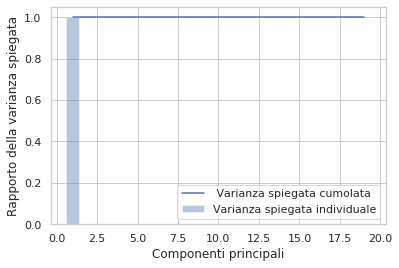

<Figure size 2569.68x1315.44 with 0 Axes>

In [21]:
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(np.arange(1,len(eigen_vals)+1), var_exp, alpha =0.4, align = "center", label = "Varianza spiegata individuale")
plt.step(np.arange(1,len(eigen_vals)+1), cum_var_exp, where='mid', label = " Varianza spiegata cumolata")
plt.xlabel("Componenti principali")
plt.ylabel("Rapporto della varianza spiegata")
plt.legend(loc = 'best')
plt.figure(figsize=(35.69,18.27))
plt.show()


In [22]:
eigen_pair = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
               for i in np.arange(len(eigen_vals))]
eigen_pair.sort(reverse=True)
W = np.hstack(((eigen_pair[0][1][:, np.newaxis],eigen_pair[1][1][:, np.newaxis]
                , eigen_pair[2][1][:, np.newaxis])))
print("Matrice W:\n",W)

Matrice W:
 [[-3.26724149e-06 -2.65078572e-04  4.26064388e-05]
 [ 4.60953597e-06 -1.31135956e-04 -1.55885872e-04]
 [ 5.27622826e-07  2.46472356e-04  5.24860138e-05]
 [-5.28360934e-07 -1.67584822e-05  3.05820951e-05]
 [-4.63121549e-07  6.83865015e-05  2.01732071e-05]
 [-8.78434816e-07  9.81141527e-05  1.00381169e-05]
 [ 1.53178815e-06  2.45241654e-04  2.99541347e-05]
 [ 6.72769324e-06 -8.83042579e-05 -5.30602933e-05]
 [ 7.40342676e-01  1.98472916e-01 -6.42250433e-01]
 [ 6.72101689e-01 -2.36998647e-01  7.01504280e-01]
 [ 2.40289788e-05  9.89711367e-04  1.61672479e-04]
 [ 3.87727886e-05  1.14480891e-03  2.83216095e-04]
 [ 2.26049522e-03  3.02808266e-02  5.91374239e-03]
 [-8.77705746e-05 -3.99257060e-03 -1.20587339e-03]
 [-8.92572750e-05 -4.93134775e-03 -1.52914531e-03]
 [ 1.29189183e-02  9.50410008e-01  3.08769104e-01]
 [ 4.70830661e-05  8.89120238e-03  3.51116103e-03]
 [ 1.03638213e-04  1.05807882e-02  4.02226960e-03]
 [ 4.00580062e-05  3.20098420e-03  5.96384791e-04]]


In [23]:
X_pca = X.dot(W)

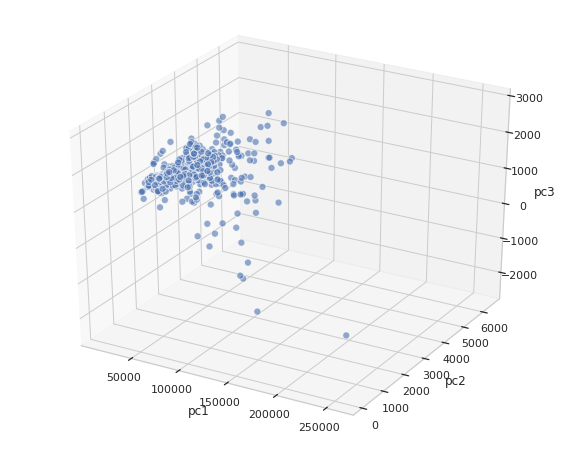

In [24]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], s=50, alpha=0.6, edgecolors='w')
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')

plt.show()


# Conclusioni
Non standardizzando i dati, la componente con la varianza più grande assorbe tutta la varianza spiegata
cumulativa, in quanto sarebbe la componente principale che spiega da sola tutta la variablità 
nei dati. 

